In [2]:
import pandas as pd
import numpy as np
import json
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from tensorflow import keras
from keras.optimizers import Adam

In [3]:
train_x_src_path = '../Dataset/assignment2New.json'
train_y_src_path = '../DataBook/Assignment2_Data_Analyst.xlsx'

test_x_src_path = '../Dataset/assignment1New.json'
test_y_src_path = '../DataBook/Assignment1_Data_Analyst.xlsx'

In [4]:
train_data = pd.read_json(train_x_src_path)
test_data = pd.read_json(test_x_src_path)

In [5]:
train_df_supervision = pd.read_excel(train_y_src_path)
train_plagiarised_array = train_df_supervision['Plagiarised'].astype(int).values

test_df_supervision = pd.read_excel(test_y_src_path)
test_plagiarised_array = test_df_supervision['Plagiarised'].astype(int).values

In [6]:
X_train = np.nan_to_num(train_data.values, nan=0, copy=True).astype(int)
y_train = train_plagiarised_array

X_test = np.nan_to_num(test_data.values, nan=0, copy=True).astype(int)
y_test = test_plagiarised_array

In [7]:
difference_in_columns = X_test.shape[1] - X_train.shape[1]

# if difference_in_columns > 0:
#     last_values = X_train[:, -1]
#     new_columns = np.tile(last_values, (difference_in_columns, 1)).T
#     X_train_extended = np.hstack((X_train, new_columns))
#     X_test_extended = X_test
# elif difference_in_columns < 0:
#     last_values = X_test[:, -1]
#     new_columns = np.tile(last_values, (-difference_in_columns, 1)).T
#     X_test_extended = np.hstack((X_test, new_columns))
#     X_train_extended = X_train
# else:
#     X_train_extended = X_train
#     X_test_extended = X_test

if difference_in_columns > 0:
    new_columns = np.zeros((X_train.shape[0], difference_in_columns))
    X_train_extended = np.hstack((X_train, new_columns))
    X_test_extended = X_test

elif difference_in_columns < 0:
    new_columns = np.zeros((X_test.shape[0], -difference_in_columns))
    X_test_extended = np.hstack((X_test, new_columns))
    X_train_extended = X_train

else:
    X_train_extended = X_train
    X_test_extended = X_test

In [8]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
X_train = imputer.fit_transform(X_train_extended)
X_test = imputer.fit_transform(X_test_extended)

In [9]:
p = Perceptron()
p.fit(X_train,y_train)

print(f"Training data score: {p.score(X_train, y_train)}")
print(f"Test data score: {p.score(X_test, y_test)}")

Training data score: 1.0
Test data score: 0.8888888888888888


In [10]:
# predictions = p.predict(X_test)
# for i in range(len(X_test)):
#     print("Predicted:", predictions[i], "Actual:", y_test[i])

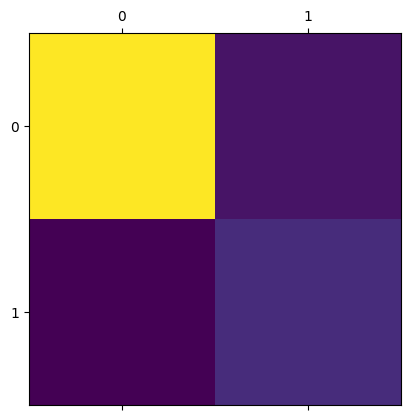

In [11]:
cm = confusion_matrix( p.predict(X_test), y_test)
# plt.set_cmap()
plt.matshow(cm)

In [12]:
modelNames = [
    '1d',
    '2d',
    '3d',
    '4d',
    '5d',
    '6d',
    '7d'
]

NODES_PER_HIDDEN_LAYER = 500

models = [ 

    keras.models.Sequential([
    keras.layers.Input(shape=(75711,)),
    keras.layers.Dense(2, activation='softmax')
]),

    keras.models.Sequential([
    keras.layers.Input(shape=(75711,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(75711,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(75711,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(75711,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

keras.models.Sequential([
    keras.layers.Input(shape=(75711,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

keras.models.Sequential([
    keras.layers.Input(shape=(75711,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

]

In [13]:
LOSS_FN = keras.losses.sparse_categorical_crossentropy

for model in models:
    model.compile(optimizer='adam',loss=LOSS_FN,metrics=['accuracy'])

In [14]:
TRAINING_EPOCHS = 5

# train all models
for model, name in zip(models, modelNames):
    print(f'training model {name}')
    model.fit(X_train, y_train, epochs=TRAINING_EPOCHS)


training model 1d
Epoch 1/5


1/1 [==============================] - 1s 500ms/step - loss: 226.6898 - accuracy: 0.8421
Epoch 2/5
1/1 [==============================] - 0s 0s/step - loss: 26635.8691 - accuracy: 0.2632
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 0s 0s/step - loss: 620.2529 - accuracy: 0.9474
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 1722.8746 - accuracy: 0.9474
training model 2d
Epoch 1/5
1/1 [==============================] - 1s 578ms/step - loss: 215.9606 - accuracy: 0.8947
Epoch 2/5
1/1 [==============================] - 0s 203ms/step - loss: 210412.5625 - accuracy: 0.1579
Epoch 3/5
1/1 [==============================] - 0s 188ms/step - loss: 3954.5662 - accuracy: 0.9474
Epoch 4/5
1/1 [==============================] - 0s 188ms/step - loss: 13366.7900 - accuracy: 0.8947
Epoch 5/5
1/1 [==============================] - 0s 212ms/step - los

In [15]:
# get all model accuracy scores on test data
scores = [model.evaluate(X_test,y_test)[1] for model in models]

2/2 [==============================] - 0s 16ms/step - loss: 8566.0498 - accuracy: 0.7963


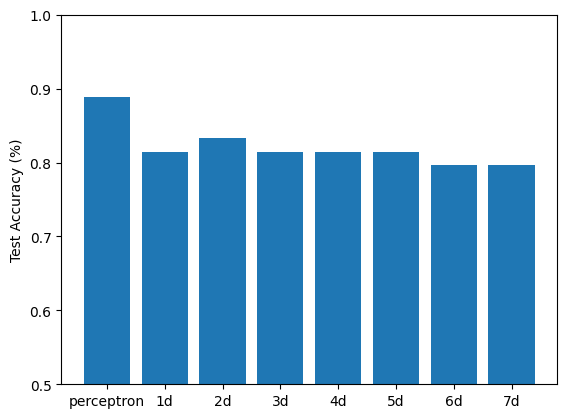

In [24]:
modelNames.insert(0, 'perceptron')
scores.insert(0, p.score(X_test, y_test) )

plt.bar(modelNames,scores)
plt.ylim(0.5, 1.0)
plt.ylabel('Test Accuracy (%)') 
plt.show()